# Анализ оттока клиентов и сегментирование пользователей банка

В этом исследовании будет проведен анализ оттока клиентов и сегментация пользователей банка. Для этого будет использована сегментация, отражающая частоту использования услуг банка клиентами. Кроме того, будет проведен анализ взаимосвязей, а также созданы несколько видов визуализаций.

## Введение

Для исследования нам предоставленны данные «Метанпромбанк» в датафрейме `https://code.s3.yandex.net/datasets/bank_scrooge.csv`.

**`Цели исследования:`**
- Определить все значимые признаки оттока клиентов;
- Сформулировать и проверить статистические гипотезы;
- Выделить сегменты клиентов, находящихся в зоне оттока;
- Дать рекомендации заказчику по стижению оттока клиентов.

**`Ход исследования`**

Работа будет разделена на несколько этапов, в каждом из которых есть ряд задач, которые необходимо выполнить:

`Этап 1` - анализ и предобработка данных
1. Загрузить и осуществить первичный анализ датафрейма;
2. Осуществить предобработку данных;
3. Добавить новые столбцы (при необходимости).

`Этап 2` - исследовательский анализ данных:
1. анилиз распределения признаков;
2. Распределение признаков в разрезе оттока;
4. анализ портрета клиентов в разрезе оттока;
5. корелляционные анализ;


`Этап 3` - статистический анализ:
1. проверка гипотезы о равенстве доходов между отточными и неотточными клиентами;
2. проверка гипотезы о равенстве кредитного рейтинга отточных и неотточных клиентов.

`Этап 4` - Подведение промежуточных итогов по исследовательскому и статистическому анализу

`Этап 5` - Сегментация клиентов: 
1. Определение сегментов на основании выделенных критериев;
2. Приоритезация сегментов.
3. Формирование рекомендации заказчику на основе исследования. 

## Анализ и предобработка данных

### Загрузка данных и первичный анализ

**Загрузим все необходимые библиотеки для настоящего исследования**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import random
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', False)

#Установим phik для проверки корреляции
! pip install phik --quiet
from phik import resources, report
from phik import phik_matrix

**Загрузим базу данных** 

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')


**Создадим функцию для первичного анализа данных** 

In [3]:
def inspect(x):
    display(df.head()) 
    df.info()
    print('Количество пропусков -', df.isna().sum())
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    for column_name in df.columns:
            display(df[column_name].value_counts())
            print(50*'*')
    return df
x = inspect(df)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
Количество пропусков - USERID           0   
score            0   
city             0   
gender           0   
age              26  
equity           0   
balance          2295
products         0   
credit_card  

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


227795    2
198635    2
210898    2
210627    2
202983    2
         ..
146877    1
214466    1
226756    1
173510    1
215039    1
Name: USERID, Length: 9927, dtype: int64

**************************************************


900.0    80
889.0    75
899.0    70
894.0    70
908.0    68
         ..
673.0    1 
998.0    1 
666.0    1 
654.0    1 
995.0    1 
Name: score, Length: 348, dtype: int64

**************************************************


Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

**************************************************


М    5005
Ж    4995
Name: gender, dtype: int64

**************************************************


36.0    414
37.0    402
33.0    392
35.0    388
34.0    384
       ... 
83.0    3  
82.0    2  
84.0    2  
86.0    2  
79.0    2  
Name: age, Length: 68, dtype: int64

**************************************************


0    2592
5    1918
4    1850
3    1543
2    1052
1    774 
6    161 
7    80  
8    17  
9    13  
Name: equity, dtype: int64

**************************************************


0.00          2
26.00         2
39.00         2
38.00         2
1500606.59    1
             ..
276.00        1
318509.47     1
644931.28     1
302662.71     1
345502.13     1
Name: balance, Length: 7701, dtype: int64

**************************************************


2    5126
1    3341
3    1039
4    474 
5    19  
0    1   
Name: products, dtype: int64

**************************************************


1    6804
0    3196
Name: credit_card, dtype: int64

**************************************************


1    5235
0    4765
Name: last_activity, dtype: int64

**************************************************


381868.89    2
49742.87     2
108250.17    2
176348.18    2
433829.32    1
            ..
165970.28    1
220657.46    1
74324.89     1
97081.83     1
117835.34    1
Name: EST_SALARY, Length: 9996, dtype: int64

**************************************************


0    8180
1    1820
Name: churn, dtype: int64

**************************************************


Выводы исходя из первичного обзора данных: 

1. У нас имеется 12 столбцов: 
- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — оценочный доход клиента,
- `сhurn` — признак оттока.
2. Имеются пропуски в следующих столбцах: 
- `age` - 26 пропусков;
- `balance` - 2295 пропусков.
3. Имеются дубликаты в столбце `USERID`
4. Минимальный возраст клиентов 18 лет, максимальный - 86. 
5. Минимальный балл кредитного рейтинга 642 балла, максимальный - 1000 баллов. 
6. Клиенты банка расположены в 3 городах: 
- `Ярославль` - 5888 клиентов;
- `Рыбинск` - 2695 клиентов; 
- `Ростов` - 1417 клиентов.
7. Из всей клиентской базы `5005` - мужчины, `4995` - женщины. 
8. Наибольшее количество клиентов состоят в возрастной категории `33-37 лет`. 
9. У `3196` клиентов банка есть `кредитные карты`, в то время, как `у 6804` клиентов они `отсутствуют`. 
10. `Активных клиентов - 4765`, `пассивных - 5235`. 
11. Наблюдается `отток` клиентов в количестве `1820 клиента`. 

### Предобработка данных

**Приведем столбцы к единому формату** 

In [4]:
df = df.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


**Для дальнейшего исследования переведем баланс и зарплату в тысячи**

In [5]:
# разделим столбцы на тысячу
df['balance'] = df['balance'] / 1000
df['est_salary'] = df['est_salary'] / 1000

**Приведем столбцы к необходимому формату** 

In [6]:
#Приведем столбцы к формату int
int_col = ['score', 'est_salary', 'age']

for column in int_col:
    df[column] = df[column].astype('int64', errors='ignore')


In [7]:
#Приведем столбцы к формату bool
bool_col = ['credit_card', 'last_activity', 'churn']
for column in bool_col: 
    df[column] = df[column].astype(bool)
    
df.dtypes

user_id          int64  
score            int64  
city             object 
gender           object 
age              float64
equity           int64  
balance          float64
products         int64  
credit_card      bool   
last_activity    bool   
est_salary       int64  
churn            bool   
dtype: object

**Проверим данные на наличие неявных дубликатов**

In [8]:
df['user_id'].value_counts()

227795    2
198635    2
210898    2
210627    2
202983    2
         ..
146877    1
214466    1
226756    1
173510    1
215039    1
Name: user_id, Length: 9927, dtype: int64

Проверка показала, что у нас имеются одинаковые идентификаторы пользователей, проверим является ли это дубликатами с помощью идентифицирующих признаков пользователей - возраст, пол и город.

In [9]:
print('Количество дубликатов-', df.duplicated(subset=['user_id', 'age', 'city', 'gender']).value_counts())

Количество дубликатов- False    10000
dtype: int64


Можно отметить, что это ошибка при присвоении идентификаторов пользователей, поскольку более детальная проверка указывает на то, что это разные пользователи. 

Дубликаты отсутствуют. 

**Проанализируем пропуски в столбцах и заполним их**

In [10]:
print('Пропуски в столбцах -', df.isna().sum())

Пропуски в столбцах - user_id          0   
score            0   
city             0   
gender           0   
age              26  
equity           0   
balance          2295
products         0   
credit_card      0   
last_activity    0   
est_salary       0   
churn            0   
dtype: int64


Количество пропусков в столбце `age` составляет менее 1% от всех данных, поэтому исключим данные пропуска. 

In [11]:
df = df.dropna(subset=['age'])
df.isna().sum()

user_id          0   
score            0   
city             0   
gender           0   
age              0   
equity           0   
balance          2279
products         0   
credit_card      0   
last_activity    0   
est_salary       0   
churn            0   
dtype: int64

Поскольку в столбце `balance` доля пропусков составляет практически четверть от всего датасета, необходимо понять природу пропусков. 

`Создадим новый признак, принимающий 1, если в наблюдении пропущено значение признака, и 0, если не пропущено`

In [12]:
df['missing_value'] = df['balance'].isnull().astype(int)

Сгруппируем столбцы по новому столбцу

In [13]:
balance_is_missing = df.groupby('missing_value').agg({'score': 'mean',
                                                     'age': 'mean',
                                                     'equity': 'median', 
                                                     'credit_card' : 'mean',
                                                     'last_activity' : 'mean',
                                                     'est_salary' : 'mean',
                                                     'products': 'median',
                                                     'churn': 'mean'}).reset_index(drop=True)

#Переведем в проценты столбцы `credit_card`, `last_activity` и `churn`
balance_columns = ['credit_card', 'last_activity', 'churn']
for column in balance_columns:
    balance_is_missing[column] = balance_is_missing[column].map('{:.2%}'.format)
#Округлим до двух значений после запятой
balance_is_missing.round(2)

,score,age,equity,credit_card,last_activity,est_salary,products,churn
0,843.74,42.92,4,64.02%,51.51%,124.02,2,23.47%
1,865.36,42.09,0,81.53%,54.89%,225.85,1,0.57%


Исходя из полученных данных можно сказать, что пропущенные данные не связаны с оттоком клиентов. Практически все клиенты, у которых пропущено значение в балансе (23.47%) являются постоянными клиентами банка и только малая часть (0,57%) клиентов с пропущенным балансам входят в категорию оттока. 

Проверим корреляцию пропущенных `balance` с другими столбцами используя библиотеку `phik`

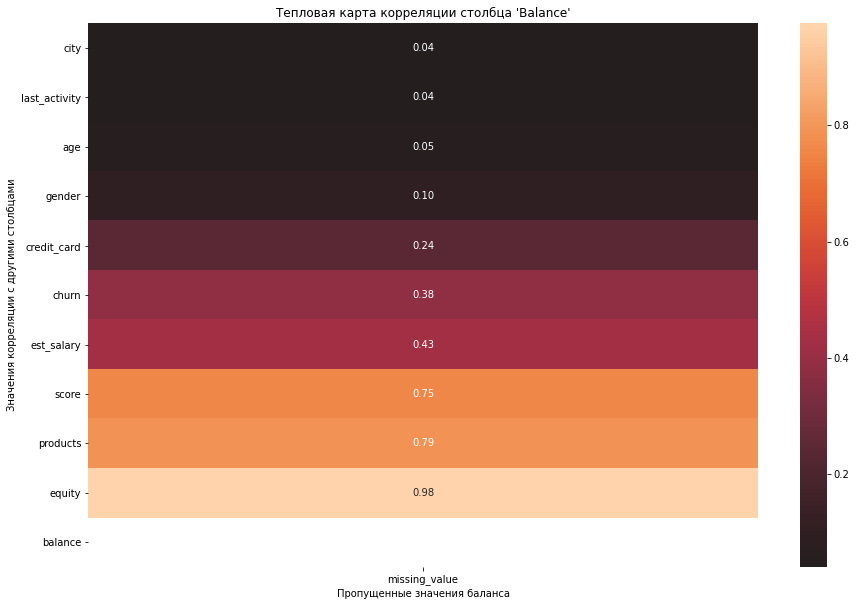

In [14]:
cor_matrix = df.drop('user_id', axis=1).phik_matrix(interval_cols = ['score', 'age', 'balance', 'est_salary'])
cor_value = cor_matrix[['missing_value']].drop('missing_value').sort_values('missing_value')


# Построим тепловую карту
plt.figure(figsize=(15, 10))
sns.heatmap(cor_value, center=0, annot=True, fmt=".2f")
plt.title("Тепловая карта корреляции столбца 'Balance'")
plt.xlabel('Пропущенные значения баланса')
plt.ylabel('Значения корреляции с другими столбцами')
plt.show()

Для трактовки силы связи между двумя наблюдаемыми величинами используем шкалу Чеддока. 

Она определяет тесноту связи следующим образом: 
- 0 – полное отсутствие связи; 
- 0 – 0.3 – очень слабая; 
- 0.3 – 0.5 – слабая; 
- 0.5 – 0.7 – средняя; 
- 0.7 – 0.9 – высокая; 
- 0.9 – 1 – очень высокая;
- 1 - абсолютная

Тепловая карта показывает, что наибольшую корреляцию с `balance` составляет `equity` ~ 1, а также наблюдается высокая корреляция с `products` и `score` - 0,79 и 0,75 соответственно.

Посольку корреляция с другими столбцами очень велика скорее всего пропущенные значения относятся к категории MNAR  (Missing Not At Random / Отсутствует не случайно) - пропуски зависят от данных, заполнение их случайными значениями или исключение из датафрейма может повлиять на дальнейшие результаты, поэтому оставим пропуски.

**Проверим количество клиентов у которых пустой баланс и отсутствуют продукты**

In [15]:
df.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_value
8957,147837,962,Рыбинск,Ж,79.0,3,NaN,0,False,False,25,True,1


В базе данных представлен один клиент у которого ноль продуктов. Исключим его из датасета.

In [16]:
df = df.query('products >= 1')

Удалим ненужные столбцы

In [17]:
df= df.drop(['user_id', 'missing_value'], axis=1)

**Выводы:** была осуществлена предобработка данных в рамках которой столбцы были приведены к необходимому формату, датафрейм был исследован на наличие явных и неявных дубликатов, а также осуществлена работа по проверке пропусков в датафрейме после чего в столбце `age` были исключены пропущуенные значения, а в столбце `balance` было принято решение оставить пропуски, поскольку они относятся к категории MNAR (Missing Not At Random / Отсутствует не случайно).

### Вывод по разделу

Исходя из первичного анализа данных можно сделать следующие выводы. 
1. Минимальный возраст клиентов 18 лет, максимальный - 86.
2. Минимальный балл кредитного рейтинга 642 балла, максимальный - 1000 баллов.
3. Клиенты банка расположены в 3 городах:
- Ярославль - 5888 клиентов;
- Рыбинск - 2695 клиентов;
- Ростов - 1417 клиентов.
4. Из всей клиентской базы 5005 - мужчины, 4995 - женщины.
5. Наибольшее количество клиентов состоят в возрастной категории 33-37 лет.
6. У 6804 клиентов банка есть кредитные карты, в то время, как у 3196 клиентов они отсутствуют.
7. Активных клиентов - 5235, пассивных - 4765.
8. Наблюдается отток клиентов в количестве 1820 человек.

## Исследовательский анализ данных

### Анализ распределения признаков

Для анализа признаков построим функции, которые помогут нам визуализировать данные


In [18]:
#Добавим цветовую палитру
colors = ['#f3d7ca', '#ffb6c1', '#ffdab9', '#d9858d', '#a43f49', '#ffd4e5', '#d4ffea', '#eecbff', '#feffa3', '#dbdcff']

In [19]:
# Построим функцию для визуализации pie и bar
def create_plots(column):
    grouped = df[column].value_counts(ascending=False)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
    
    ax1.pie(grouped, labels=None, autopct='%1.1f%%', startangle=90)
    
    ax1.set_title(f'Распределение {column}')

    sns.barplot(x=grouped.index, y=grouped, ax=ax2, order=grouped.index)
    ax2.set_title(f'Распределение {column} (количество)')
    ax2.set_xlabel(f'Значение столбца {column}')
    ax2.set_ylabel('Количество')
    for i, v in enumerate(grouped):
        ax2.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

    plt.show()

# Построим функцию для визуализации только bar 
def create_bar(column):
    grouped = df[column].value_counts(ascending=False)
    plt.figure(figsize=(15, 10))
    sns.barplot(x=grouped.index, y=grouped, order=grouped.index)
    plt.title(f'Распределение {column} (количество)')
    plt.xlabel(f'Наименование {column}')
    plt.ylabel('Количество')
    
    for i, v in enumerate(grouped):
        plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)
    
    plt.show()


**`score`**

In [20]:
#Создаем функцию для визуализации признаков в графике boxplot

def create_boxplot(column, x_range=None):
    
    
    fig, ax = plt.subplots(figsize=(17, 4))
    
    
    sns.boxplot(data=df, x=column, width=0.5, ax=ax)
    
    
    ax.set_xlim(x_range)
    
    
    ax.set_title(f'Распределение {column}')
    ax.set_xlabel(f'Значения {column}')
    ax.set_ylabel(column)
    
    plt.show()

In [21]:
df['score'].describe().reset_index()

,index,score
0,count,9973.000000
1,mean,848.671212
2,std,65.393153
3,min,642.000000
4,25%,802.000000
5,50%,853.000000
6,75%,900.000000
7,max,1000.000000


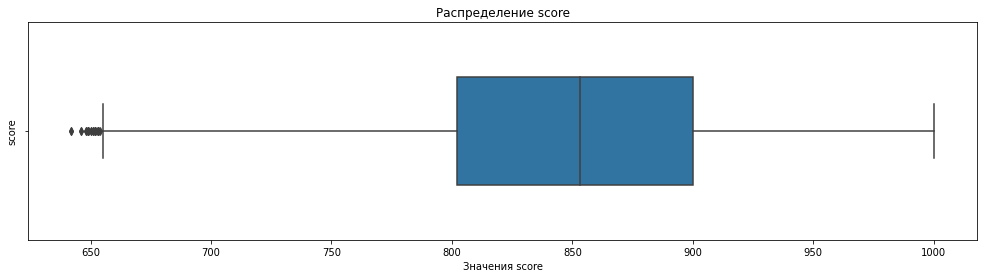

In [22]:
create_boxplot('score')

**Медианное значение кредитного рейтинга - 853 балла**. Межквартильный размах находится в диапазоне 802-900 баллов рейтинга. Большинство клиентов имеют высокий рейтинг. 

**`city`**

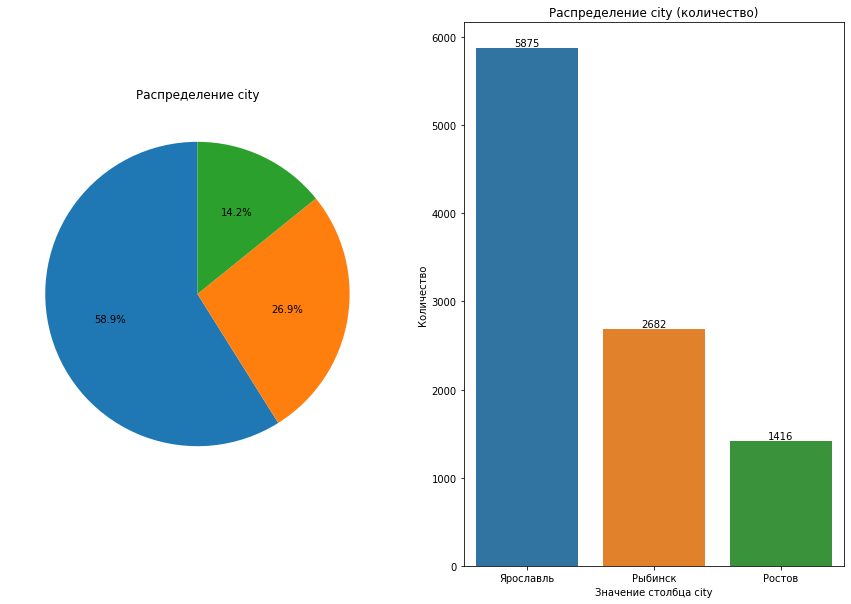

In [23]:
create_plots('city')

`Наибольшее количество клиентов находится в Ярославле - 5875 клиентов (58.9%)`, в Рыбинске - 2683 (26.9%) и в Ростове 1416 (14.2%) 

**`gender`**

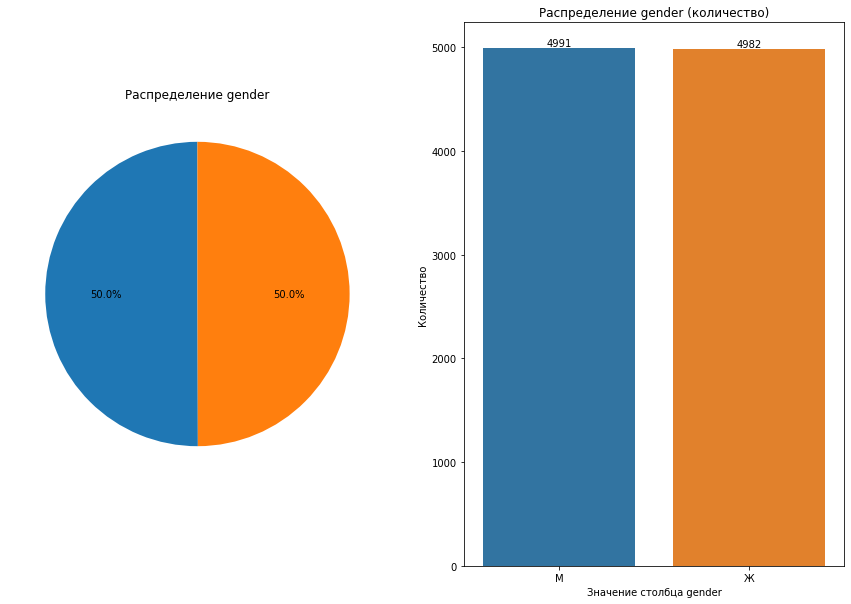

In [24]:
create_plots('gender')

**Клиенты по половой принадлежности распределены 50 на 50**. Незначительная разница в 8 клиентов между не имеет существенное значение. В датасете представлено оптимальное распределение по гендерному признаку. 

**`age`**

In [25]:
df['age'].describe().reset_index()

,index,age
0,count,9973.000000
1,mean,42.730773
2,std,12.175166
3,min,18.000000
4,25%,33.000000
5,50%,40.000000
6,75%,51.000000
7,max,86.000000


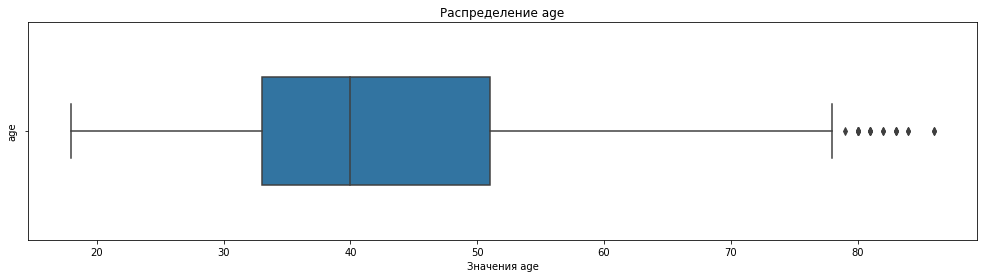

In [26]:
create_boxplot('age')

**Медианный возраст клиента составляет - 40 лет**. Наибольшее количество клиентов находится в диапазоне от 33 до 51 года. Все, что выше 78 лет является выбросами. Минимальный порог 18 лет, что логично, поскольку в РФ наступает совершеннолетие с этого возраста. 

**`equity`**

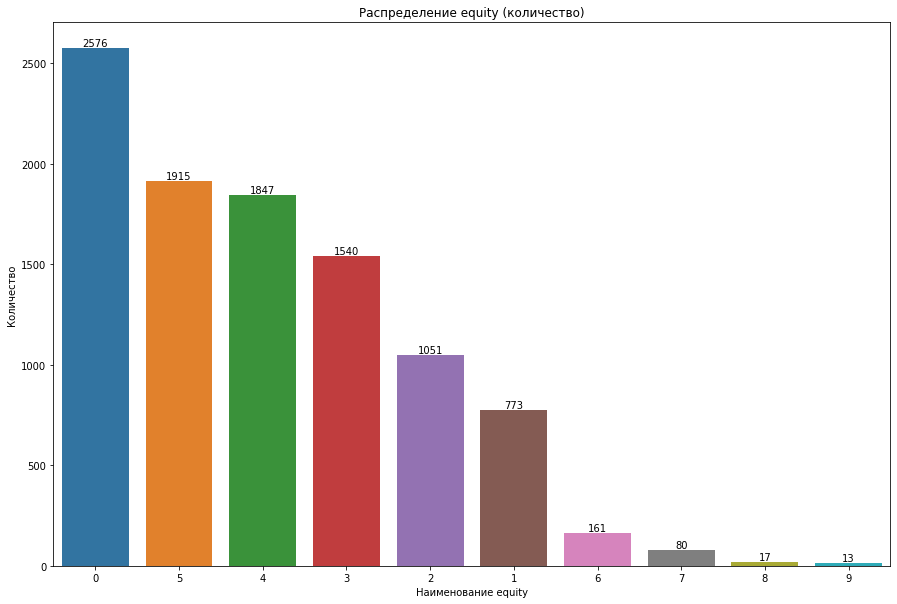

In [27]:
create_bar('equity')

Рассматривая данный график можно установить, что около половины клиентов имеет от 3 до 5 баллов собственности, в то время, как четверть клиентов вообще не имеет собственности. Немалая часть клиентов имеет 1-2 балла собственности и лишь немногие имеют баллы от 6 до 9. 


**`balance`**

In [28]:
df['balance']
df['balance'].describe().reset_index()

,index,balance
0,count,7695.000000
1,mean,827.245588
2,std,1980.327410
3,min,0.000000
4,25%,295.698715
5,50%,524.295330
6,75%,980.051215
7,max,119113.552010


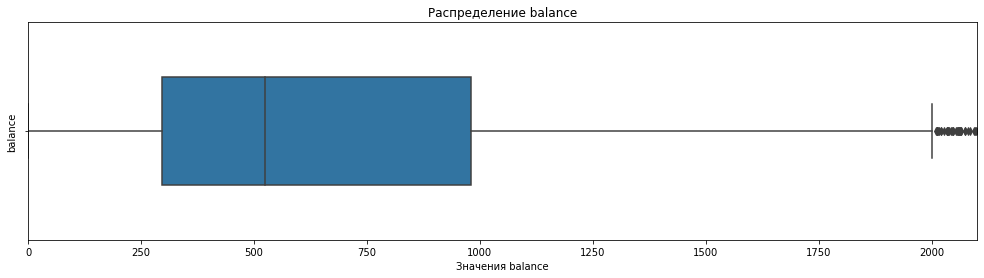

In [29]:
create_boxplot('balance', (0, 2100))

Медианное значение баланса у клиентов составляет - 524 тысячи, что является очень даже хорошим показателем, с учетом того, что медианная заработная плата составляет 119 тысяч рублей. Межквартильный диапазон составляет от 295 тысяч до 980 тысяч. Минимальный баланс составляет 0, Максимальный 119 миллинов. Согласно боксплоту, баланс выше 2 млн является выбросами. 

**`products`**

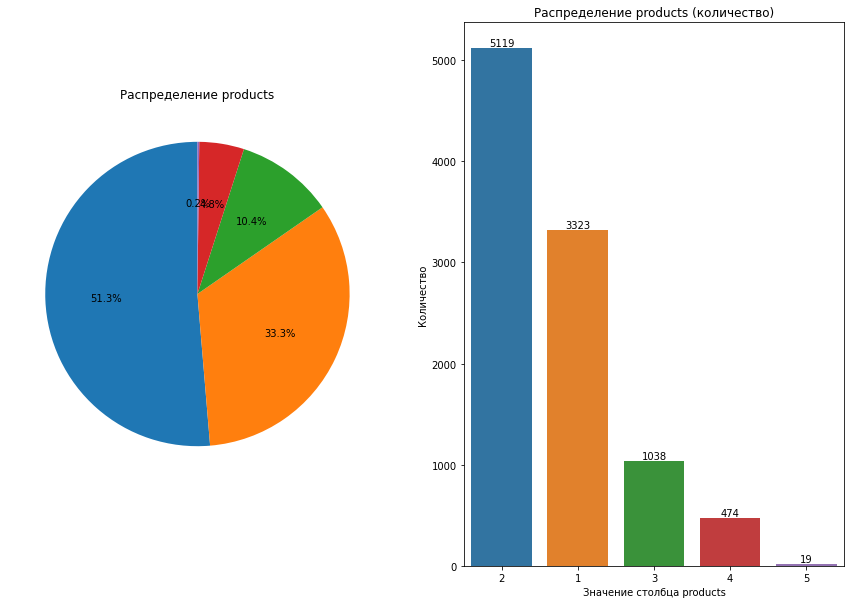

In [30]:
create_plots('products')

Более половины клиентов (51.3%) пользуются 2 продуктами, 33.3% клиентов пользуются 1 продуктом и оставшаяся часть пользуется 3-5 продуктами. 

**`credit_card`**

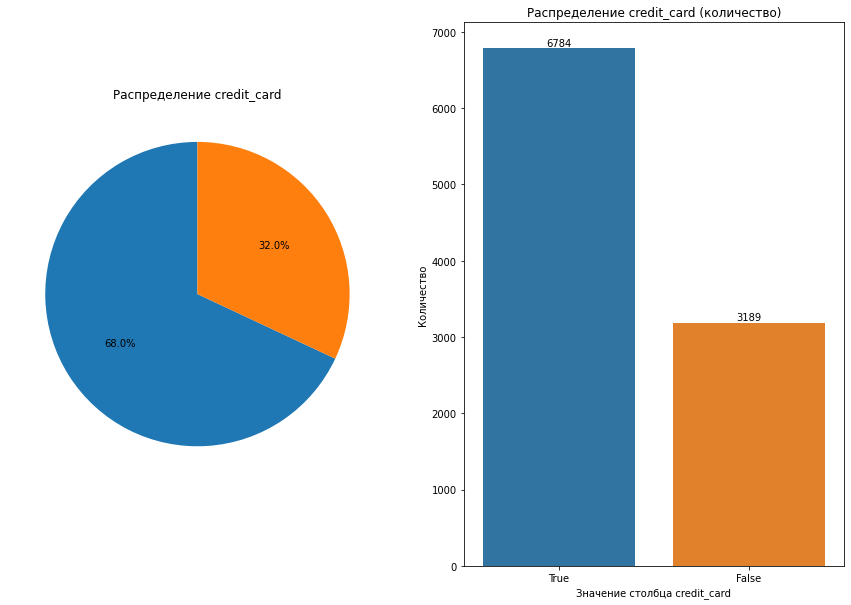

In [31]:
create_plots('credit_card')

Большинство клиентов имеется кредитные карты в банке (68%).

**`last_activity`**

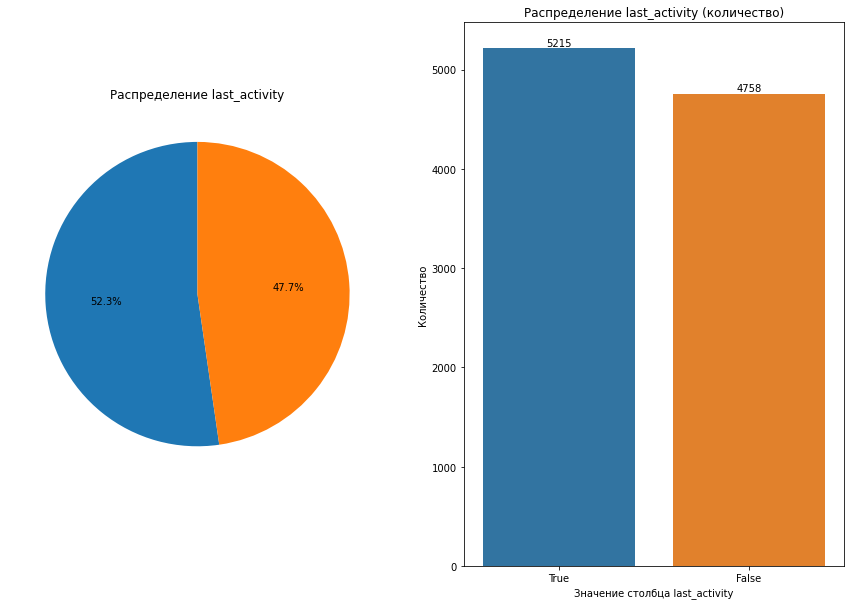

In [32]:
create_plots('last_activity')

Показатели активности клиентов в банке распределены почти поровну 52.3% на 47.7%. Однако, в связи с тем, что у нас отсутствуют данные, как происходит расчет данного показателя, установить либо предположить, почему в этом показатели значения практически равны не представляется возможным. 

**`est_salary`**

In [33]:
df['est_salary'].describe().reset_index()

,index,est_salary
0,count,9973.000000
1,mean,147.295197
2,std,139.291118
3,min,2.000000
4,25%,75.000000
5,50%,119.000000
6,75%,174.000000
7,max,1395.000000


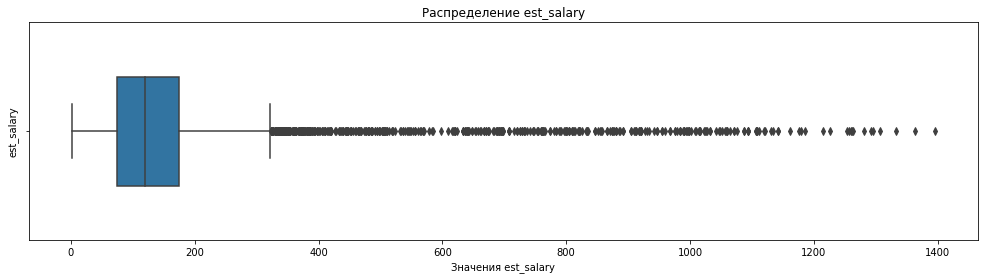

In [34]:
create_boxplot('est_salary')

**Средняя заработная плата составляет - 119 тысяч рублей**, что является достаточно неплохим показателем для региона РФ. Межквартильный размах от 75 до 174 тысяч рублей. 

**`churn`**

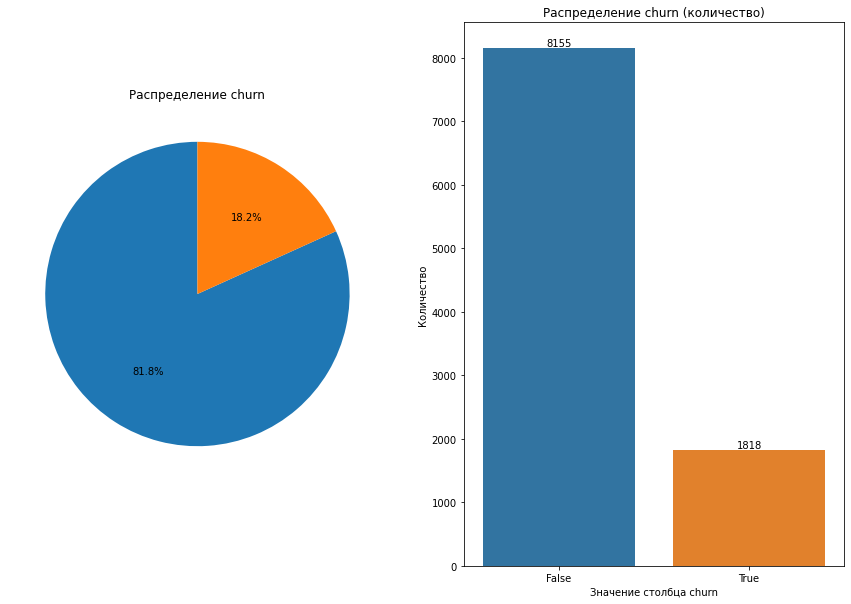

In [35]:
create_plots('churn')

**Уровень оттока клиентов составляет 18.2%**

**`Выводы:`**
1. Средний кредитный рейтинг клиентов банка составляет 853 балла. 
2. Наибольшее количество клиентов находится в Ярославле - 5875 клиентов (58.9%)
3. Клиенты по половой принадлежности распределены 50 на 50.
4. Наибольшее количество клиентов находится в возрастном диапазоне от 33 до 51 года.
5. Почти половина клиентов имеет от 3 до 5 баллов собственности, в то время, как четверть клиентов вообще не имеет собственности, немалая часть клиентов имеет 1-2 балла собственности и лишь немногие имеют баллы от 6 до 9.
6. У большинства клиентов баланс на счете составляет от 295 тысяч до 980 тысяч.
7. 68% клиентов имеют кредитные карты. 
8. Показатели активности клиентов в банке распределены почти поровну 52.3% на 47.7% в пользу активных клиентов. 
9. Заработная плата основной массы клиентов находится в диапазоне от 75 тысяч до 174 тысяч рублей. 
10. Процент оттока клиентов составляет - 18.2%.

### Распределение признаков в разрезе оттока

#### Анализ непрерывных признаков

Построим функцию для непрерывного признака в разрезе оттока, которая позволит нам увидеть интервалы признака, на которых отток выше, чем лояльность. 

In [36]:
def create_hist(data, column, x_range=None, bins=None):
    plt.figure(figsize=(15, 10))
    
    if bins is None:
        bins = 70
        
    sns.histplot(data=df, x=column, hue='churn', bins=bins, stat='density', common_norm=False, kde=True)
    plt.title(f'Распределение {column} в разрезе отточности')
    plt.xlabel(f'Значение столбца {column}')
    plt.ylabel('Плотность')
    if x_range is not None:
        plt.xlim(x_range)
    plt.grid(True)
    plt.show()

**`score`**

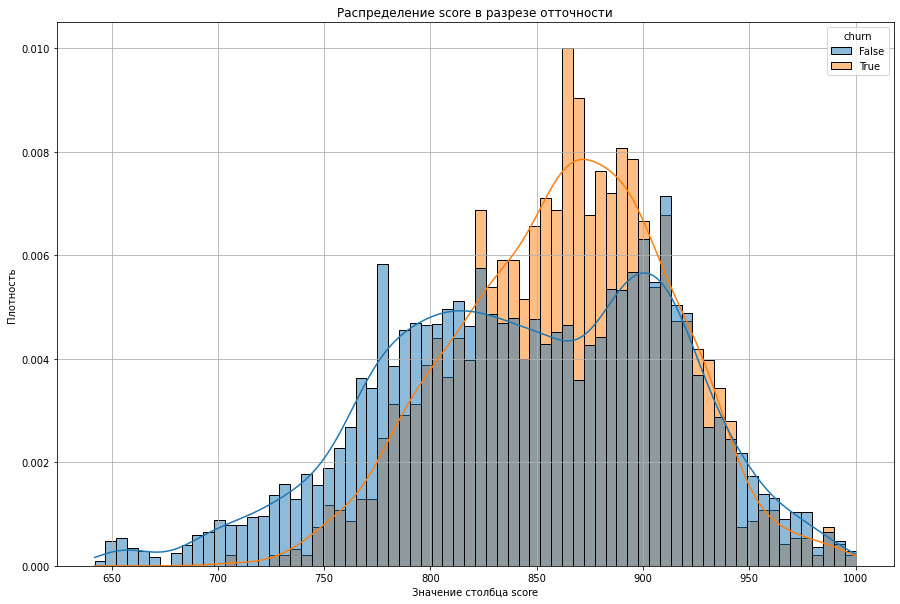

In [37]:
create_hist(df, 'score')

Наибольшее количество оттока наблюдается у клиентов с высоким кредитным рейтингом от 820 и до 940 баллов, что является большим упущением для банка, поскольку данная масса клиентов является зачастую платежеспособной. 

In [38]:
churn_score = df.query('820 <= score <= 940')['churn'].mean()
print('Процент оттока по крелитному рейтингу от 820 и до 940 баллов составляет:', (churn_score*100).round(2), '%')

Процент оттока по крелитному рейтингу от 820 и до 940 баллов составляет: 22.9 %


**`age`**

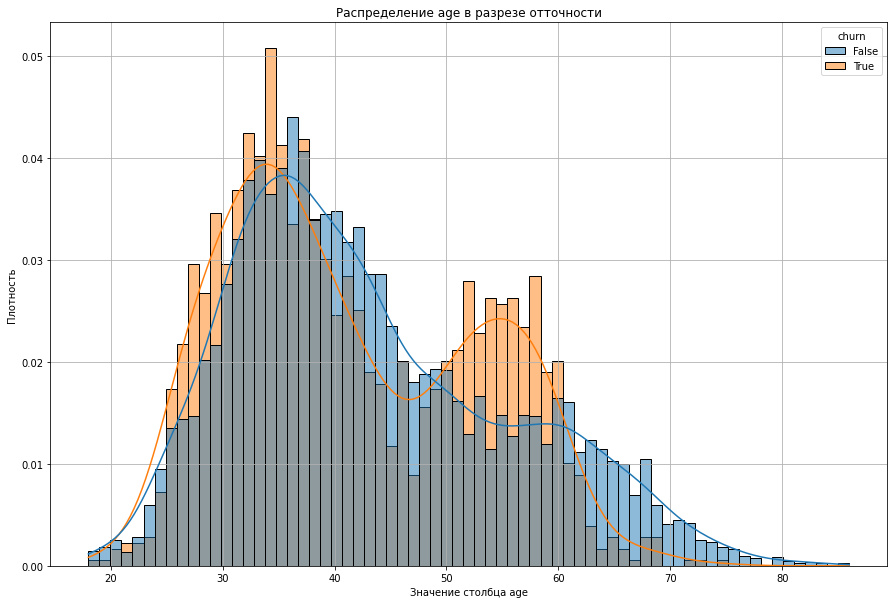

In [39]:
create_hist(df, 'age', bins=69)

График показывает, что у нас есть две возрастных группы по оттокам клиентов от 25 до 35 лет и от 50 до 58 лет. 

Посчитаем отток у данных категорий

In [40]:
churn_age_1 = df.query('25 <= age <= 35')['churn'].mean()
churn_age_2 = df.query('50 <= age <= 58')['churn'].mean()
print('Отток клиентов в возрасте от 25 до 35 лет составляет:', (churn_age_1 * 100).round(2), '%')
print('Отток клиентов в возрасте от 50 до 58 лет составляет:', (churn_age_2 * 100).round(2), '%')

Отток клиентов в возрасте от 25 до 35 лет составляет: 21.77 %
Отток клиентов в возрасте от 50 до 58 лет составляет: 27.07 %


**`balance`**

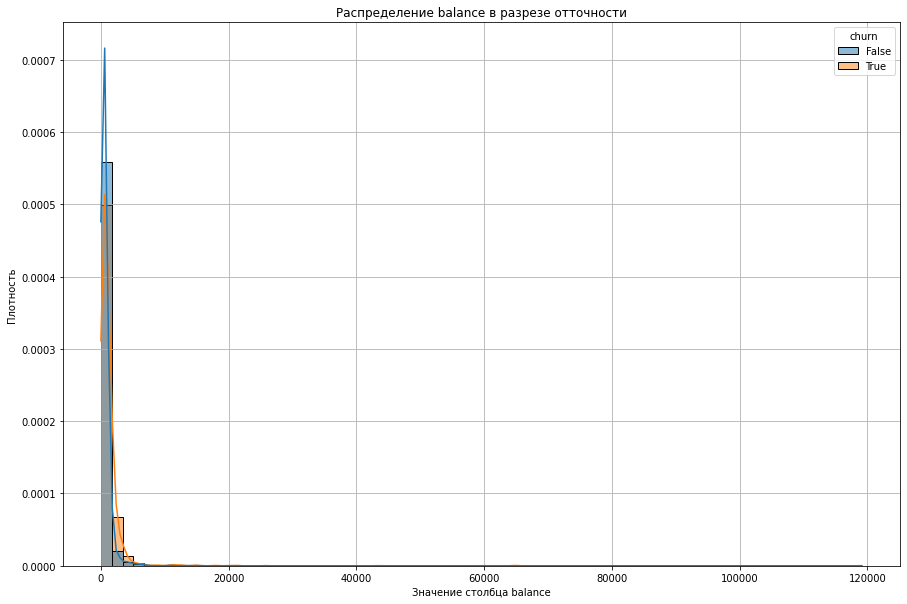

In [41]:
create_hist(df, 'balance')

График получился очень отдаленным, попробуем добавить диапазон. 

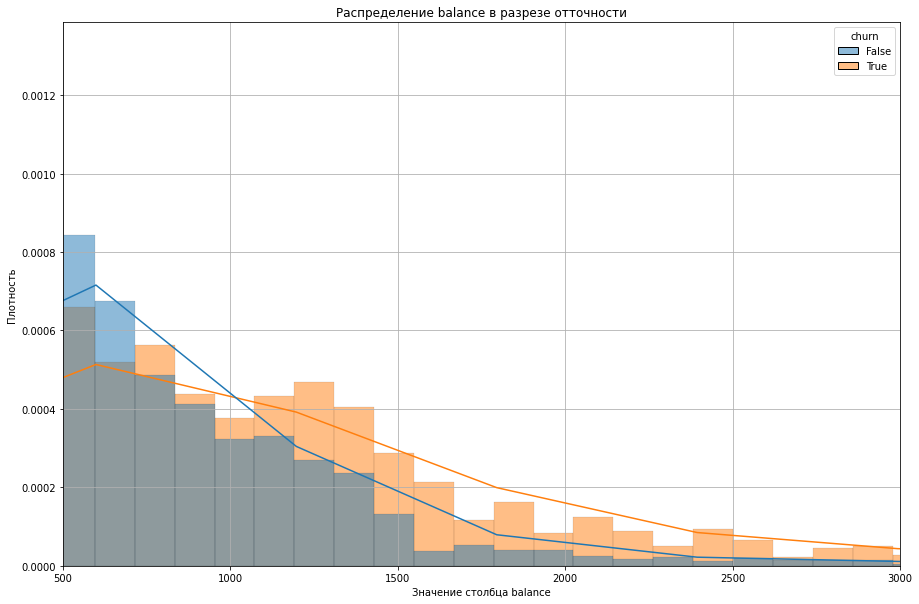

In [42]:
create_hist(df.query('balance < 4000'), 'balance', x_range=(500,3000), bins=1000)

Чем выше у клиентов баланс тем чаще они входят в группу оттока. Отток клиентов начинается ориентировочно с достижением у клиента баланса в размере 750 тысяч. 

Посчитаем отток

In [43]:
churn_balance = df.query('balance >= 750')['churn'].mean()
print('Отток клиентов с балансом более чем 750 тысячс рублей оставляет:', (churn_balance * 100).round(2), '%')

Отток клиентов с балансом более чем 750 тысячс рублей оставляет: 34.85 %


**`est_salary`**

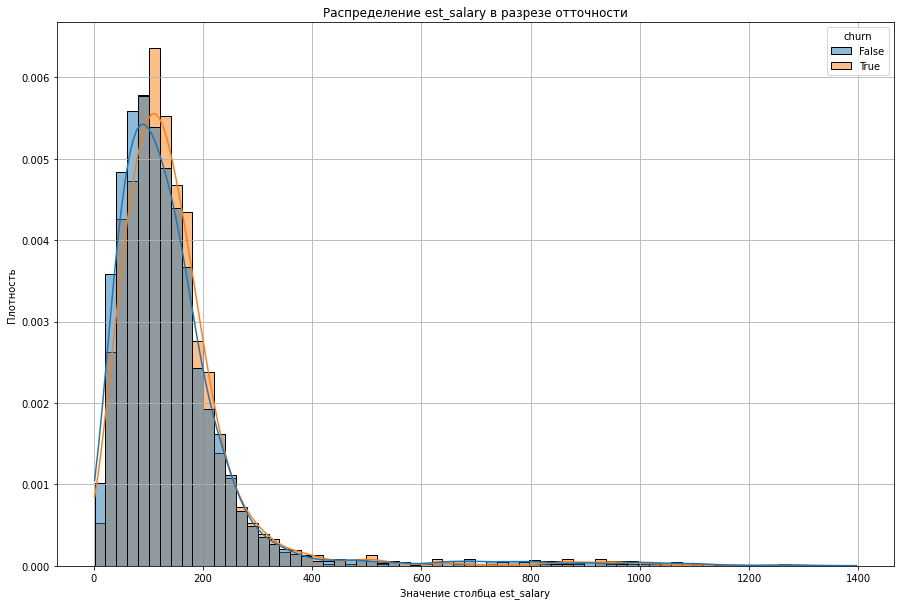

In [44]:
create_hist(df, 'est_salary')

Большое количество оттока наблюдается при достижении клиентами заработной платы 

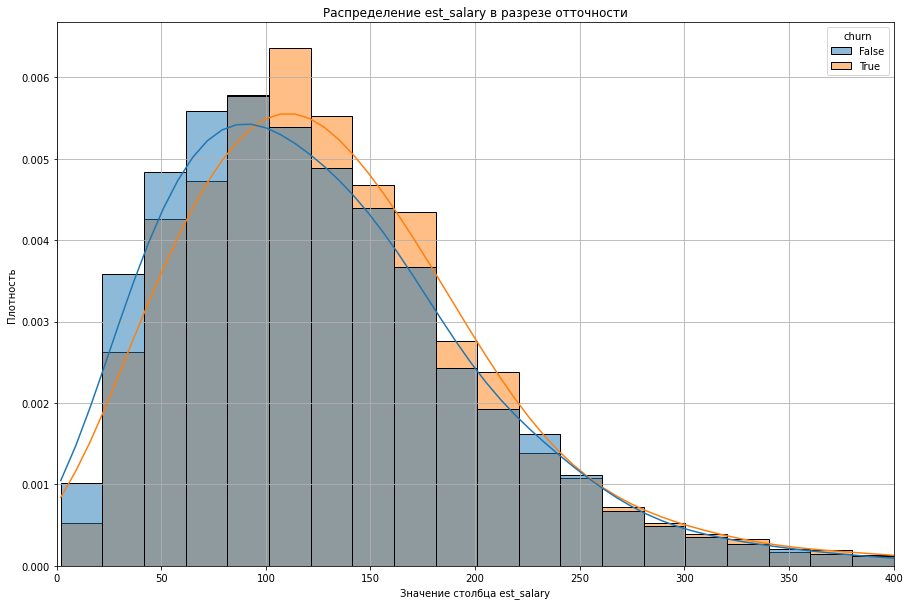

In [45]:
create_hist(df, 'est_salary', x_range=(0, 400))

Как мы видим, отток клиентов начинается примерно с 90 тысяч рублей и начиная со 100 тысяч рублей стремительно растет. После 230 тысяч наблюдается замедление роста оттока. 

Попробуем рассчитать процент отток с учетом диапазона 90-230 тысяч

In [46]:
churn_salary = df.query('90 <= est_salary <= 230')['churn'].mean()
print('Процент оттока по заработной плате от 90 тысяч до 230 тысяч составляет:', (churn_salary*100).round(2), '%')

Процент оттока по заработной плате от 90 тысяч до 230 тысяч составляет: 19.97 %


**`Выводы по неприрывным признакам:`**
1. У клиентов с `кредитным рейтингом от 820 до 940 балло`в наблюдается высокий процент оттока - `22.9 %`.
2. Наблюдается 2 `возрастных категории` клиентов с высоким уровнем оттока `25-35 лет` и `50-58 лет` - `21.77% и 27.07%`.
3. Отток клиентов с `балансом` `более чем 750 тысячс` рублей оставляет: `34.85 %`.
4. Процент оттока по `заработной плате от 90 тысяч до 230 тысяч` составляет: `19.97 %`.


#### Анализ категориальных/дискретных признаков

Проанализируем категориальные/дискретные признаки, чтобы понять, какое из значений категориального признака более или менее склонно к оттоку.

In [47]:
#Определим среднее значение оттока

mean_churn = df['churn'].mean()
print(f'Среднее значение оттока составляет {mean_churn:.2%}')


Среднее значение оттока составляет 18.23%


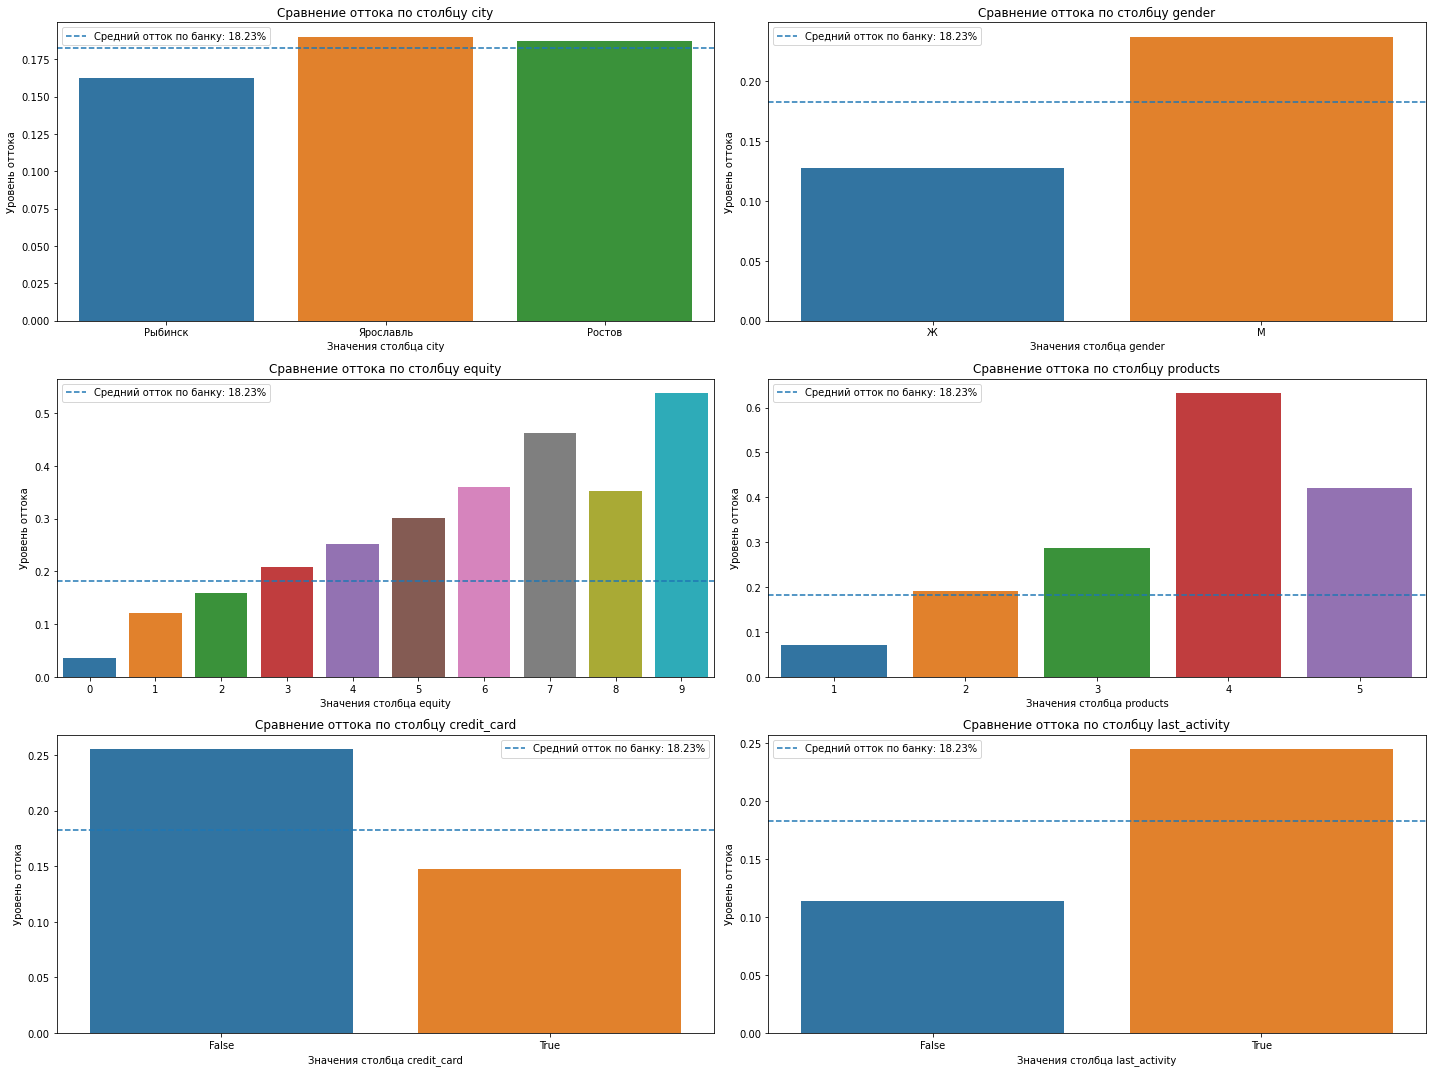

In [48]:
#Построим функцию для построения uарфиков для категориальных признаков

columns = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']

fig, axes = plt.subplots(len(columns) // 2, 2, figsize=(20, 15))

for i, column in enumerate(columns):
    
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.barplot(data=df, x=column, y='churn', ci=None, ax=ax)
    
    ax.axhline(mean_churn, linestyle='--', label=f'Средний отток по банку: {mean_churn:.2%}')

    ax.set_title(f'Сравнение оттока по столбцу {column}')
    ax.set_xlabel(f'Значения столбца {column}')
    ax.set_ylabel('Уровень оттока')
    ax.legend()
    
plt.tight_layout()
plt.show()

**`Выводы по категориальным/дискретным признакам оттока:`**
1. Наибольший **отток** наблюдается в **Ярославле**, что и логично, поскольку наибольшее количество клиентов живут в этом городе, на втором место Ростов и на третьем Рыбинск. 
2. По **половому признаку** наблюдается больший отток со стороны **мужчин**. 
3. Чем **больше** у клиентов **баллов собственности** - тем **выше риск оттока** данных клиентов. Отток в банке заметно увеличивается начиная с 3 баллов собственности.
4. У клиентов **с 4 продуктами наибольший процент оттока**, далее идут клиенты с 5 и 3 продуктами, наименьший процент оттока клиентов с 2 продуктами. У клиентов с 1 продукт отток отсутствует. 
5. Клиенты **не обладающие кредитными картами имеют больший процент оттока**, чем клиенты с кредитными картами. 
6. **Активные** клиенты чаще имеют **склонность к оттоку**, чем пассивные. 

### Анализ портрета клиентов в разрезе оттока

In [49]:
# Разделим клиентов на отточных и неотточных
churn_group = df[df['churn'] == True]
no_churn_group = df[df['churn'] == False]

# Построим списки для расчет среднего, медианного значения и моды
mode_columns = ['gender', 'city']
mean_columns = ['score',  'balance', 'est_salary']
median_columns = ['age', 'balance', 'last_activity', 'credit_card', 'est_salary', 'products', 'equity']


# Построим функцию для нового датасета со средними и медианными значениями
def group_stats(data):
    result_df = pd.DataFrame(columns=['Показатель', 'Значение'])

    mean_values = []
    for column in mean_columns:
        mean = data[column].mean()
        mean_values.append({'Показатель': f'mean {column}', 'Значение': mean})

    median_values = []
    for column in median_columns:
        median = data[column].median()
        median_values.append({'Показатель': f'median {column}', 'Значение': median})

    # Объединим словари в один датафрейм
    result_df = pd.DataFrame(mean_values + median_values)

    return result_df

# Посчитаем портреты клиентов
churn_stats = group_stats(churn_group).round(2)
no_churn_stats = group_stats(no_churn_group).round(2)

# Объединим таблицы
portraits = churn_stats.merge(no_churn_stats, on='Показатель')
portraits.columns = ['Значение показателя', 'Отток', 'Не отток']

# считаем относительную разницу (отточные относительно неотточных)
portraits['Относительная разница (%)'] = (((portraits['Отток'] / portraits['Не отток']) - 1) * 100).round(2)

# добавляем расчет моды
for column in mode_columns:
    mode_churn = churn_group[column].mode().iloc[0]
    mode_no_churn = no_churn_group[column].mode().iloc[0]
    portraits = pd.concat([portraits, pd.DataFrame({'Отток': [mode_churn], 'Не отток': [mode_no_churn]}, index=[f'Мода {column}'])])

portraits



,Значение показателя,Отток,Не отток,Относительная разница (%)
0,mean score,863.36,845.4,2.12
1,mean balance,1134.46,733.03,54.76
2,mean est_salary,147.87,147.17,0.48
3,median age,39.0,40.0,-2.50
4,median balance,783.91,475.41,64.89
5,median last_activity,1.0,0.0,inf
6,median credit_card,1.0,1.0,0.00
7,median est_salary,125.0,118.0,5.93
8,median products,2.0,2.0,0.00
9,median equity,4.0,3.0,33.33


1. Средний показательно оттока по кредитному рейтингу - 863 балла. 
2. Средний показатель баланса по оттоку - 1134 тысячи рублей, в то время, как медианный - 783 тысячи рублей. 
3. Средний показатель по заработной платек по оттоку - 147 тысяч, когда медианный - 125 тысяч рублей. 
4. Медианный возраст оттока клиентов - 39 лет, клиенты старше - 40 более стабильные. 
5. У клиентов с 2 продуктами относительной разницы между оттоком и удержанием нет. 
6. Клиенты с 4 баллами собственности более подвержены к оттоку, клиенты с баллами собственности <=3 более надежные.
7. Мужчины более подвержены к оттоку, чем женщины.
8. В связи с тем, что в Ярославле наиболее количество клиентов - в данном городе клиенты подвержены оттоку в большем количестве. 
9. Клиенты с большей активностью чаще подвержены к оттоку. 
10. Клиенты с банковскими картами чаще подвержены к оттоку, что связано с тем, что их 68% от общего количества. 

### Корелляционные анализ

**Проверим корреляцию столбца оттока с другими столбцами используя библиотеку phik**

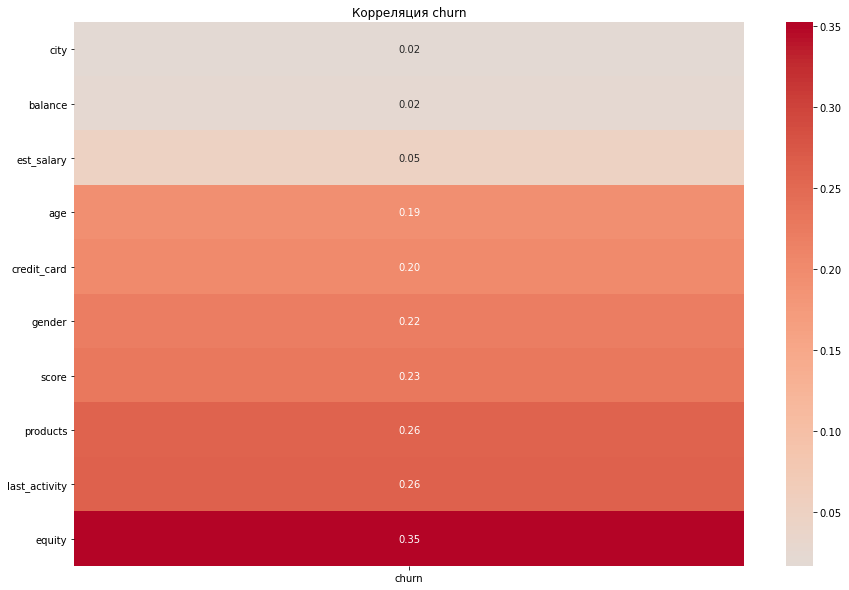

In [50]:
corr_matrix = df.phik_matrix(interval_cols = ['score', 'age', 'balance', 'est_salary'])

corr_churn = corr_matrix[['churn']].drop('churn').sort_values('churn')
plt.figure(figsize=(15, 10))
sns.heatmap(corr_churn, cmap='coolwarm', center=0, annot=True, fmt=".2f")

plt.title('Корреляция churn')
plt.show()

Для трактовки силы связи между двумя наблюдаемыми величинами используем шкалу Чеддока. 

Она определяет тесноту связи следующим образом: 
- 0 – полное отсутствие связи; 
- 0 – 0.3 – очень слабая; 
- 0.3 – 0.5 – слабая; 
- 0.5 – 0.7 – средняя; 
- 0.7 – 0.9 – высокая; 
- 0.9 – 1 – очень высокая

**`Выводы:`**
1. Наибольшая корреляция наблюдается у оттока с баллами собственности - 0,35 (слабая корреляция по Чеддоку)
2. На втором месте корреляция оттока с активностью и количеством продуктов - 0,26 (очень слабая корреляция по Чеддоку)
3. Корелляция с кредитным рейтингом (0,23), полом (0,22) и наличием кредитных карт(20№), является очень слабой.
4. Корелляция с остальными показателями менее 0,2. 
5. Наименьшая корреляция у оттока по городам - 0,02, что означает практически полное отсутствие связи. 

### Вывод по разделу

Рассматривая итоги данного раздела хочется выделить следующее:

1. **Процент оттока клиентов составляет - 18.2%**
2. `Корреляция между оттоком и другими характеристиками низкая`. Наибольшая корреляция наблюдается у оттока с баллами собственности - 35%.
3. Чем `выше кредитный рейтинг` клиента тем `больше` вероятность его `оттока`. Количество оттока клиентов с кредитным рейтингом `от 820 до 940 баллов - 22.9% оттока`.
4. Наибольшее количество клиентов расположено в Ярославле(58.9%), в связи с чем, уровень оттока клиентов в этом городе самый высокий.
5. В датасете количество клиентов по половой принадлежности 50 на 50, однако `мужчины чаще склоны к оттоку нежели женщины`. 
6. Наибольшее количество `клиентов банка` в возрастном диапазоне от `33 до 51 года`. Чаще всего `подтвергнуты к оттоку клиенты 25-35 лет и 50-58 лет - 21.77% и 27.07%` от общего числа клиентов соответственно.
7. У большинства клиентов баланс на счете составляет от 295 тысяч до 980 тысяч, однако `с 750 тысяч на балансе рублей увеличивается отток клиентов`. Так, отток клиентов с балансом более чем 750 тысячс рублей оставляет: `34.85 %`.
8. Наблюдается высокий `отток` клиентов с `заработной платой` от `90 тысяч до 230 тысяч составляет: 19.97 %`.
9. Более половины клиентов имеют 3-5 баллов собственности, четверть клиентов имеют 0 баллов собственности, при этом `рост оттока клиентов начинается у клиентов от 3 баллов рейтинга и выше`.
10. Показатели активности клиентов в банке распределены почти поровну 52.3% на 47.7% в пользу активных клиентов, причем `активные клиенты чаще склоны к оттоку`. 
11. Клиенты не обладающие кредитными картами более подвергнуты оттоку, чем клиенты с кредитными картами. 


## Статистический анализ

### Проверка гипотезы о равенстве доходов между отточными и неотточными клиентами

Сформулируем гипотезы:

**`H_0:`** статистистической разницы между доходами отточных и неотточных клиентов нет

**`H_1:`**  статистическая разница между доходами отточных и неотточных клиентов есть.

Для начала нам необходимо определить возможно ли использовать t-тест Стьюдента. 

Для проведения t-тест, нужно проверить следующим условиям:

- Выборочные средние нормально распределены.
- Дисперсии рассматриваемых генеральных совокупностей равны.

In [51]:
# Создадим две переменных по отточным и неотточным клиентам по уровню дохода
salary_churn = df[df['churn'] == True]['est_salary']
no_salary_churn = df[df['churn'] == False]['est_salary']

In [52]:
#Задаем стандартное значение альфы
alpha = 0.05

In [53]:
#Построим функцию 
def test(test_churn):
    
    # Проводим тест Шапиро-Уилка
    shapiro_test_stat, p_value = st.shapiro(test_churn)
    print('p-значение: ', p_value)
    
    # Проверяем гипотезу о нормальности
    if p_value < alpha:
        print('Распределение не является нормальным')
    else:
        print('Распределение является нормальным')  
    # Проверяем дисперсию
    print(test_churn.var())

In [54]:
test(salary_churn)

p-значение:  0.0
Распределение не является нормальным
15114.953505669775


In [55]:
test(no_salary_churn)

p-значение:  0.0
Распределение не является нормальным
20359.61530323613


Исходя из этого, можно отметить, что распределение значений не является нормальным и дисперсии между собой не равны, соответственно мы не можем использовать t-test Стьюдента.


**Используем метод U-критерий Манна — Уитни**

In [56]:
results = st.mannwhitneyu(salary_churn, no_salary_churn)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  0.0001636758648269818
Отвергаем нулевую гипотезу


Полученные результаты указывают, что у отточных и неоточных клиентов имеется значительная разница в уровне дохода.

### Проверка гипотезы о равенстве кредитного рейтинга между отточными и неотточными клиентами

Сформулируем гипотезы:

**`H_0:`** статистистической разницы между кредитным рейтингом отточных и неотточных клиентов нет

**`H_1:`**  статистическая разница между кредитным рейтингом отточных и неотточных клиентов есть.

In [57]:
# Создадим две переменных по отточным и неотточным клиентам по кредитному рейтингу
score_churn = df[df['churn'] == True]['score']
no_score_churn = df[df['churn'] == False]['score']

Проведем тест

In [58]:
test(score_churn)

p-значение:  9.341003897134215e-05
Распределение не является нормальным
2458.2453747851396


In [59]:
test(no_score_churn)

p-значение:  6.163534187648631e-26
Распределение не является нормальным
4623.062654176869


Исходя из этого, можно отметить, что распределение значений не является нормальным и дисперсии между собой не равны, соответственно мы не можем использовать t-test Стьюдента.


**Используем метод U-критерий Манна — Уитни**

In [60]:
results = st.mannwhitneyu(score_churn, no_score_churn)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  4.508763537702903e-22
Отвергаем нулевую гипотезу


Так, можно утверждать, что статистическая разница между кредитным рейтингом отточных и неотточных клиентов есть. Чем больше кредитный рейтинг - тем выше вероятность оттока клиентов. 

### Вывод по разделу

1. Статистическая разница в доходах у отточных и неотточных клиентов присутствует, что и следовало ожидать, поскольку ранее в исследовании мы наблюдали, что чем выше доход у клиента и больше баллов собственности - тем больше вероятность оттока. 
2. Статистическая разница в кредитном рейтинге отточных и неоточных клиентов также присутствует. Ранее в исследовании мы наблюдали, чем больше у клиента кредитный рейтинг - тем больше он склонен к оттоку. 

##  Подведение промежуточных итогов по исследовательскому и статистическому анализу

**`В рамках исследовательского анализа было осуществлено ряд мероприятий и выявлены следующие закономерности:`**

**1. Анализ распределения признаков:**

- **Средний кредитный рейтинг** клиентов банка составляет **853 балла**.
- Наибольшее количество **клиентов** находится **в Ярославле - 5875 клиентов (58.9%)**.
- Клиенты по **половой принадлежности распределены 50 на 50**.
- Наибольшее количество клиентов находится в **возрастном диапазоне от 33 до 51 года**.
- Почти **половина** клиентов имеет от **3 до 5 баллов собственности**, в то время, как **четверть** клиентов вообще **не имеет собственности**, немалая часть клиентов имеет 1-2 балла собственности и лишь немногие имеют баллы от 6 до 9.
- **У большинства** клиентов **баланс** на счете составляет **от 295 тысяч до 980 тысяч**.
- **68% клиентов имеют кредитные карты**.
- Показатели активности клиентов в банке распределены почти поровну 52.3% на 47.7% в пользу активных клиентов.
- **Заработная плата основной массы** клиентов находится в диапазоне **от 75 тысяч до 174 тысяч рублей**.


**2. Распределение признаков в разрезе оттока:**

- **Процент оттока клиентов составляет - 18.2%**
- Наибольшая корреляция наблюдается у оттока с баллами собственности - 35%.
- Количество оттока клиентов с **кредитным рейтингом от 820 до 940 баллов - 22.9% оттока**.
- Влияние местонахождения на отток не установлено.
- `Мужчины чаще склоны к оттоку нежели женщины`.
- Чаще всего подтвергнуты к **оттоку клиенты 25-35 лет и 50-58 лет - 21.77% и 27.07%** от общего числа клиентов соответственно.
- C **750 тысяч на балансе рублей увеличивается отток клиентов**. Так, отток клиентов с балансом более чем 750 тысячс рублей оставляет: **34.85 %**.
- Наблюдается высокий отток клиентов с **заработной платой от 90 тысяч до 230 тысяч составляет: 19.97 %**.
- Более половины клиентов имеют 3-5 баллов собственности, четверть клиентов имеют 0 баллов собственности, при этом рост **отток**а клиентов начинается у клиентов **от 3 баллов рейтинга и выше**.
- Показатели активности клиентов в банке распределены почти поровну 52.3% на 47.7% в пользу активных клиентов, причем активные клиенты чаще склоны к оттоку.
- Клиенты не обладающие кредитными картами более подвергнуты оттоку, чем клиенты с кредитными картами.

**3. Статистический анализ гипотез:**
- Статистическая разница в доходах у отточных и неотточных клиентов присутствует, что и следовало ожидать, поскольку ранее в исследовании мы наблюдали, что **чем выше доход** у клиента и больше баллов собственности - **тем больше вероятность оттока**.
- Статистическая разница в кредитном рейтинге отточных и неоточных клиентов также присутствует. Ранее в исследовании мы наблюдали, **чем больше у клиента кредитный рейтинг - тем больше он склонен к оттоку**.

**4. Идеальный портерт клиента банка:**
- город Ярославль(58.9%);
- Возраст от 33 до 51 года;
- Заработная плата 75-175 тыс. рублей;
- Пол - женский (меньше риск оттока);
- Обладает высоким кредитным рейтингом 853 баллов;
- Количество продуктов 2 (51.3%)
- Есть кредитная карта (68%);
- Владеет 0-2 баллами собственности;
- Баланс на счете от 250 до 750 тысяч рублей. 



**`На основании вышеизложенных выводов выделим несколько критериев отточности клиентов для будущей сегментации`** 

1. По половому признаку - мужчины;
2. Баланс выше 750 тысяч;
3. Заработная плата от 90 тысяч рублей;
4. Кредитный рейтинг от 820 до 940 баллов;
5. Баллы собственности от 3 до 9;
6. Количество продуктов более 2.
7. Возраст от 25-35 лет и от 50 до 58 лет.
8. Отсутствие кредитов.

## Сегментация клиентов

### Определение сегментов на основании выделенных критериев

**Выделим 3 сегмента с уровнем оттока в сегменте выше среднебанковского, каждый из которых будет включать не менее 500 клиентов.**
1. Потенциальные заемщики - молодые клиенты в возрасте от 25 до 35 лет с заработком от 90 тысяч рублей, хорошей кредитной историей и отсутствием кредитных карт.
2. Состоятельные клиенты - клиенты с заработной платой выше 90 тысяч рублей балансом свыше 750 тысяч и баллами собственности выше 3;
3. Взрослые клиенты без кредитных карт - клиенты в возрасте от 50 до 55 лет, не имеющие кредитных карт. 



**Потенциальные молодые заемщики мужчины**

In [61]:
def segment_size(segment):
    # считаем размер группы и количество отточных клиентов
    segment_size = len(segment)
    churn_count = segment['churn'].sum()
    # рассчитываем уровень оттока
    churn_rate = segment['churn'].mean() * 100  # в процентах
    
    print("Количество клиентов в сегменте:", segment_size)
    print("Количество отточных клиентов в группе:", churn_count)
    print("Уровень оттока в группе:", churn_rate.round(2), "%")

In [62]:
segment_1 = df.query('25 <= age <=35 & 820 <= score <=940 & products == 2')
segment_size(segment_1)


Количество клиентов в сегменте: 970
Количество отточных клиентов в группе: 334
Уровень оттока в группе: 34.43 %


Данный сегмент включает в себя 970 клиентов 334 (34.43%) из которых являются отточными. Данные категория является важной для любого банка, поскольку молодые клиенты зачастую нуждаются больше в привлечение денежных средств будь-то на покупку новой недвижимости, открытия бизнеса, банковского вклада и тд. 

Данному сегменту клиентов можно предложить:

**Состоятельные клиенты**

In [63]:
segment_2 = df.query('est_salary >= 90 & equity >=3 & balance >= 750')

segment_size(segment_2)

Количество клиентов в сегменте: 1883
Количество отточных клиентов в группе: 756
Уровень оттока в группе: 40.15 %


Категория состоятельных клиентов составляет практически пятую часть всей клиентской базы и уровень оттока составляет 40.15% (756 человек). Банку однозначно стоит задуматься об удержании данной массы клиентов специальными условиями. 

**Взрослые клиенты без кредитных карт** 

In [64]:
segment_3 = df.query('credit_card == False & 50 <= age >= 55')

segment_size(segment_3)

Количество клиентов в сегменте: 833
Количество отточных клиентов в группе: 173
Уровень оттока в группе: 20.77 %


Сегмент взрослых клиентов без кредитных карт самый мелкий из вышеуказанных (всего 833 клиента) и процент оттока наименьший 20.77 (173 клиентов). Для удержания данной категории клиентов банку необходимо более навязчиво предложить некоторые свои услуги, включая специальные предложения по выпуску кредитных карт. 

### Приоритезация сегментов

**`Приоритизация сегментов будет расположена в следующем порядке:`** 

1. **Состоятельные клиенты** (наибольший сегмент из всех), т.к данные сегмент позволяет банку получить больше всего преимуществ: 
- Стабильные депозиты;
- Высокий уровень доходности;
- Надежность платежей;
- Возможность привлечь новых состоятельных клиентов;
- Большие кредитные лимиты.
2. **Молодые потенциальные заемщики**, который позволить получить банку следующие преимущества:
- Долгосрочные отношения;
- Повышенная лояльность; 
- Стимулирование к развитию новых продуктов;
- Большие перспективы роста доходности.
3. **Взрослые клиенты без кредитных карт**, преимущества:
- Привлечение новых заемщиков;
- Взрослые клиенты чаще всего являются надежными клиентами.

### Формирование рекомендации заказчику на основе исследования

**В рамках данного исследования был выделен ряд сегментов клиентов с высоким уровнем оттока:** 

- **Состоятельный сегмент** - самый большой сегмент по численности - 1883 клиентов с наибольшим количеством оттока - 756 клиентов (40.15%); 
- **Молодые потенциальные заемщики** - второй по численности сегмент - 970 клиентов с высокой долей оттока - 334 клиента (34.43%);
- **Взрослые клиенты без банковский карт** - сегмент с наименьшим количеством клиентов -  833 клиента и наименьшим оттоком - 173 клиентов (20.77%).


**Для каждого выделенного сегмента хочется предоставить свои рекомендации, которые могут поспособствовать удержанию клиентской базы:**

**1. Для клиентов из `Состоятельного сегмента` предложить следующее:**
- Увеличить лимиты снятия без комиссии денежных средств в банкоматах Метанпромбанк;
- Увеличить лимиты перевода денежных средств без комиссий между банками;
- Установить льготный курс приобретения валюты;
- Установить специальные условия по вкладам;
- Повышенный лимит по кредитным картам;
- Премиум ипотеку со специальными условиями;
- Выделить персонального менеджера.

**2. Для клиентов из сегмента `Молодые потенциальные заемщики` предлагается:**
- Оформить специальные условия кредитования на новые объекты недвижимости;
- Оформить специальные условия банковская вклада; 
- Повышенные условия по кэшбеку по дебетовым и кредитовым картам;
- Специальные условия по обслуживанию дебетовых и кредитных карт.

**3. Для наименьшего из сегментов `Взрослые клиенты без кредитных карт` предложить:**
- специальные условия при получении кредитных карт (с повышенным кэшбеком, бесплатным обслуживанием, увеличением лимита снятия без комиссии и тд)
- потребительский кредит со специальными условиями;
- улучшить условия обсулживания дебетовой карты (повысить кэшбек, добавить бесплатное обслуживание, увеличить лимиты снятия без комиссий.